<a href="https://colab.research.google.com/github/mmmchai/foodhub/blob/main/FoodHub_EDA_%26_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FoodHub Data Analysis



### Context

New York's restaurant scene is expanding rapidly, catering to busy students and professionals who rely on dining out or food delivery. FoodHub, a food aggregator, simplifies this with a single app connecting users to multiple restaurants.

Customers place orders through the app, which directs them to the restaurant. Once confirmed, a company-assigned delivery person picks up the order, navigates using the app, and delivers it to the customer. The app tracks each step, allowing customers to rate their experience. FoodHub earns revenue by taking a fixed commission from restaurant orders.

### Objective

To analyze order demand on the app and deliver data-driven recommendations to enhance the customer experience.

### Data Description

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Import libraries & data

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# update file path
file_path = "filepath"

### Understanding data structure

In [ ]:
# read the data
df = pd.read_csv(file_path + "/foodhub_order.csv")
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations**:

*    The data has 1898 rows and 9 columns. Data in each row corresponds to an order placed by a customer.

In [ ]:
# List column of different datatypes
print("dtype int64:", df.select_dtypes(include="int64").columns.tolist())
print("dtype float64:", df.select_dtypes(include="float64").columns.tolist())
print("dtype object:", df.select_dtypes(include="object").columns.tolist())

dtype int64: ['order_id', 'customer_id', 'food_preparation_time', 'delivery_time']
dtype float64: ['cost_of_the_order']
dtype object: ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']


**Observations**:

*   Integer columns are: ['order_id', 'customer_id', 'food_preparation_time', 'delivery_time']
*   Float columns are: ['cost_of_the_order']
*   Object (categorical/text) columns are: ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

The rating column, though currently an object, requires conversion to a numerical format as this field represents a numerical scale from 1 to 5.


In [ ]:
# Check the unique values on each column
df.nunique()

,0
order_id,1898
customer_id,1200
restaurant_name,178
cuisine_type,14
cost_of_the_order,312
day_of_the_week,2
rating,4
food_preparation_time,16
delivery_time,19


In [ ]:
# Check for missing values
df.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


**Observations**:
There are no missing values present in the original dataset.

In [ ]:
# Check for statistical summary of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


**Observations**:

*   Cost: average = 16.5,  median = 14.14, meaning there are more orders on the low cost end.
*   Min food preparation = 20 mins
*   Max food preparation = 35 mins
*   Average food preparation = 27 mins
*   Average delivery time = 24 mins


In [ ]:
# Check for statistical summary of categorical data
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


In [ ]:
# Check unique values in each categorical column
cat_cols = df.select_dtypes(include="object").columns.tolist()

for i in cat_cols:
    print(df[i].value_counts(normalize = True))

    print('*' * 40)

restaurant_name
Shake Shack                 0.115
The Meatball Shop           0.070
Blue Ribbon Sushi           0.063
Blue Ribbon Fried Chicken   0.051
Parm                        0.036
                             ... 
Sushi Choshi                0.001
Dos Caminos Soho            0.001
La Follia                   0.001
Philippe Chow               0.001
'wichcraft                  0.001
Name: proportion, Length: 178, dtype: float64
****************************************
cuisine_type
American         0.308
Japanese         0.248
Italian          0.157
Chinese          0.113
Mexican          0.041
Indian           0.038
Middle Eastern   0.026
Mediterranean    0.024
Thai             0.010
French           0.009
Southern         0.009
Korean           0.007
Spanish          0.006
Vietnamese       0.004
Name: proportion, dtype: float64
****************************************
day_of_the_week
Weekend   0.712
Weekday   0.288
Name: proportion, dtype: float64
*********************************

#### Transform Data

In [ ]:
# Column: Rating
df["rating"].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
# Convert Rating into numerical datatype by replacing "Not Given" values with NaN
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating"].value_counts()

,count
rating,
5.000,588
4.000,386
3.000,188


In [ ]:
# check for null again
df.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


**Observations**:
There are 736 unrated orders, with rating value as "not given".

To ease further analysis, "Rating" column is converted to a numeric datatype by replacing value "Not Given" with NaN . This transformation resulted in 736 missing values.

### Exploratory Data Analysis (EDA)

### Univariate Analysis - Explore single variable disbribution

<Axes: xlabel='delivery_time'>

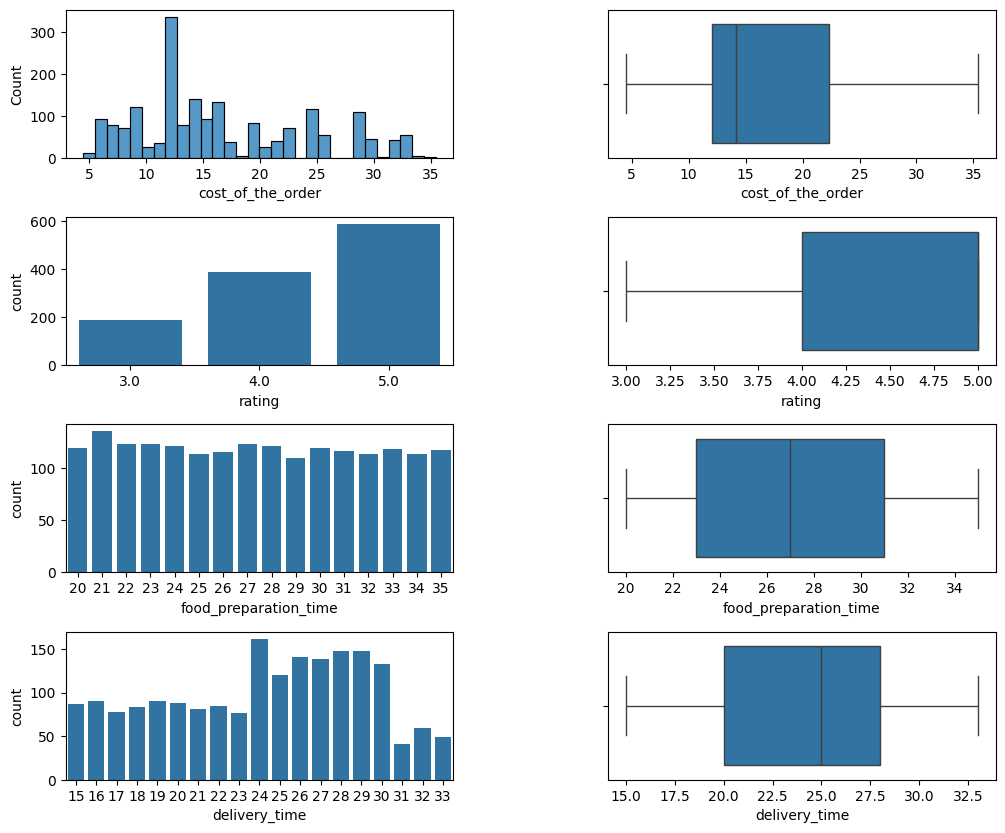

In [ ]:
# Plot histogram & boxplot of Cost, Rating, Time columns
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(4, 2, 1)
sns.histplot(data=df,x='cost_of_the_order', bins=30)
ax = fig.add_subplot(4, 2, 2)
sns.boxplot(data=df,x='cost_of_the_order')

ax = fig.add_subplot(4, 2, 3)
sns.countplot(data=df,x='rating')
ax = fig.add_subplot(4, 2, 4)
sns.boxplot(data=df,x='rating')

ax = fig.add_subplot(4, 2, 5)
sns.countplot(data=df,x='food_preparation_time')
ax = fig.add_subplot(4, 2, 6)
sns.boxplot(data=df,x='food_preparation_time')

ax = fig.add_subplot(4, 2, 7)
sns.countplot(data=df,x='delivery_time')
ax = fig.add_subplot(4, 2, 8)
sns.boxplot(data=df,x='delivery_time')

([0, 1], [Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')])

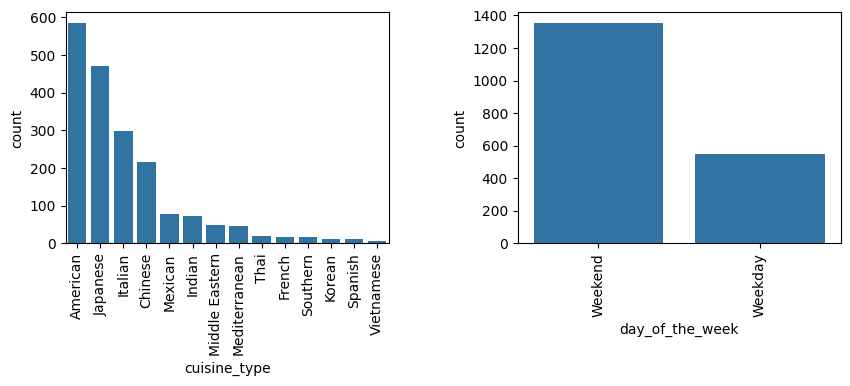

In [ ]:
# Plot countplot of Cuisine type & Day of the Week
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
sns.countplot(data=df,
              x='cuisine_type' ,
              order = df['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)

ax = fig.add_subplot(1, 2, 2)
sns.countplot(data=df,
              x='day_of_the_week',
              order = df['day_of_the_week'].value_counts().index)
plt.xticks(rotation=90)


In [ ]:
# Function to get top N restaurant
def top_n_restaurant(data, n):
  df_top = data.groupby(['restaurant_name']).agg({"cost_of_the_order": "sum", "order_id":"count"}).sort_values(by=['order_id'], ascending = False).reset_index()
  df_top["perc_of_total_revenue"] = df_top["cost_of_the_order"] / df_top["cost_of_the_order"].sum()
  df_top.rename(columns={"cost_of_the_order":"total_revenue", "order_id":"total_order"}, inplace=True)

  return df_top.head(n)



In [ ]:
# Call top_n_restaurant function
top_n_restaurant(df, 10)

,restaurant_name,total_revenue,total_order,perc_of_total_revenue
0,Shake Shack,3579.530,219,0.114
1,The Meatball Shop,2145.210,132,0.069
2,Blue Ribbon Sushi,1903.950,119,0.061
3,Blue Ribbon Fried Chicken,1662.290,96,0.053
4,Parm,1112.760,68,0.036
5,RedFarm Broadway,965.130,59,0.031
6,RedFarm Hudson,921.210,55,0.029
7,TAO,834.500,49,0.027
8,Han Dynasty,755.290,46,0.024
9,Blue Ribbon Sushi Bar & Grill,666.620,44,0.021


####Observations

*  **Cost of order**: Right skewed data. There are more orders below the average cost, among which $12 dollar orders are the majority.

*  **Rating**:  Assuming the data is accurate and no low ratings are deleted, only people who are satisfied with the order tends to leave a rating, majority of the orders received 5-star rating.

*  **Preparation time**: Uniform distribution.

*  **Delivery time**: Most of the orders are delivered between 24 - 30 mins.

*  **Cuisine typ**e: Among the 14 cuisine types, the top 4 most popular cuisines are American, Japanese, Italian and Chinese, which have significantly higher # of orders than the rest.

*   **Day of Week**: The total # of orders received during weekends is 50% more than weekdays. This does not consider the difference in # of days during these 2 periods (2 days in weekend, 5 days in weekdays).

*   **Restaurant Name**: Shake shack is the most popular restaurant on this app, contributing to 11% of total sales.


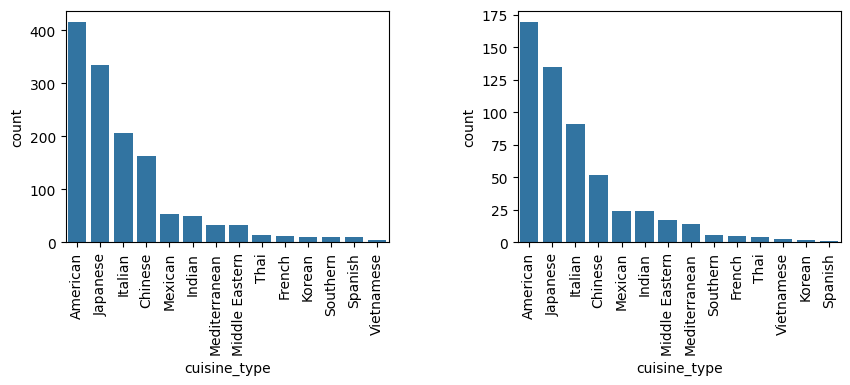

In [ ]:
# Further explore if the demand distribution of Cuisine type on weekend vs weekday
df_weekend = df[df["day_of_the_week"]=="Weekend"]
df_weekday = df[df["day_of_the_week"]!="Weekend"]

fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
sns.countplot(data=df_weekend,
              x='cuisine_type' ,
              order = df_weekend['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)

ax = fig.add_subplot(1, 2, 2)
sns.countplot(data=df_weekday,
              x='cuisine_type',
              order = df_weekday['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

**Observations**:
Demand distribution of cuisine type is similar between weekend and weekdays.

In [ ]:
# Most frequent customers
df["customer_id"].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


**Observations:**

Top 3 customers are:
1.   Cutomer ID 52832 ordered 13 orders
2.   Cutomer ID 47440 ordered 10 orders
3.   Cutomer ID 83287 ordered 9 orders



### Multivariate Analysis - explore relationships between variables

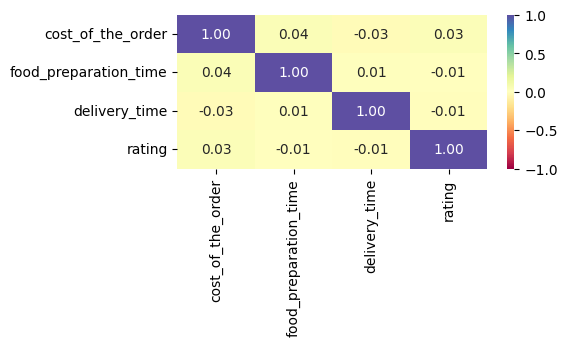

In [ ]:
# Corration Plot of numerical columns
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
plt.figure(figsize=(5, 2))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Avg Cost vs Avg Rating by Cuisine

In [ ]:
# Calculate average rating by cuisine type
avg_rating_per_cuisine  = df.groupby("cuisine_type")["rating"].mean().sort_values(ascending=False)

# Calculate average cost by cuisine type
avg_cost_per_cuisine = df.groupby("cuisine_type")["cost_of_the_order"].mean().sort_values(ascending=False)

# Calculate total order by cuisine type
total_order = df.groupby("cuisine_type")["order_id"].count().sort_values(ascending=False)

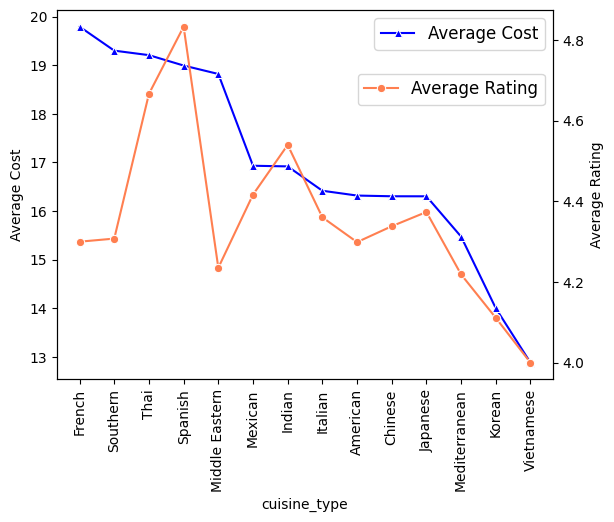

In [ ]:
# Plot Average Cost vs Average Rating by Cuisine type

fig, ax1 = plt.subplots()
sns.lineplot(
    x=avg_cost_per_cuisine.index,
    y=avg_cost_per_cuisine.values,
    ax=ax1,
    color='blue',
    marker='^')
ax1.set_ylabel('Average Cost')
plt.legend(["Average Cost"],fontsize=12,bbox_to_anchor=(1,1))
plt.xticks(rotation=90)

ax2 = ax1.twinx()
sns.lineplot(
    x=avg_rating_per_cuisine.index,
    y=avg_rating_per_cuisine.values,
    ax=ax2,
    color='coral',
    marker='o')
ax2.set_ylabel('Average Rating')
plt.legend(["Average Rating"],fontsize=12,bbox_to_anchor=(1,0.85))
plt.xticks(rotation=90)
plt.show()


*   Cuisine types with price higher than average do not necessarily have higher than average rating.

#### Cuisine vs. Cost

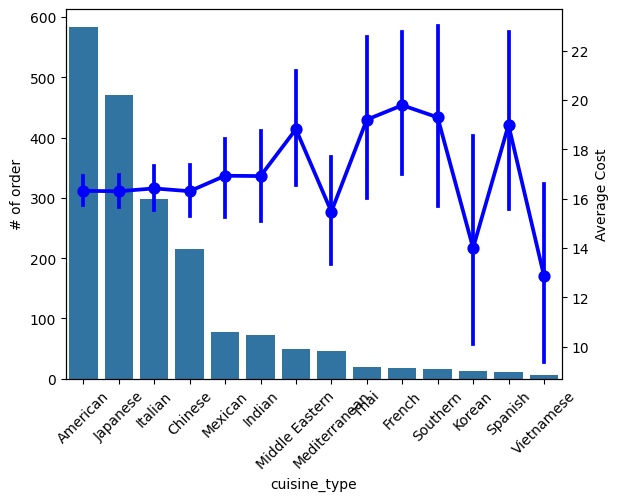

In [ ]:
# Overlay Total order barplot & Average Cost point plot
fig, ax1 = plt.subplots()
sns.countplot(data=df,
              x='cuisine_type' ,
              order = df['cuisine_type'].value_counts().index)
ax1.set_ylabel('# of order')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
sns.pointplot(
    data=df,
    x="cuisine_type",
    y="cost_of_the_order",
    estimator=lambda x: x.mean(),
    color="blue",
    order=total_order.index)
ax2.set_ylabel('Average Cost')

plt.show()

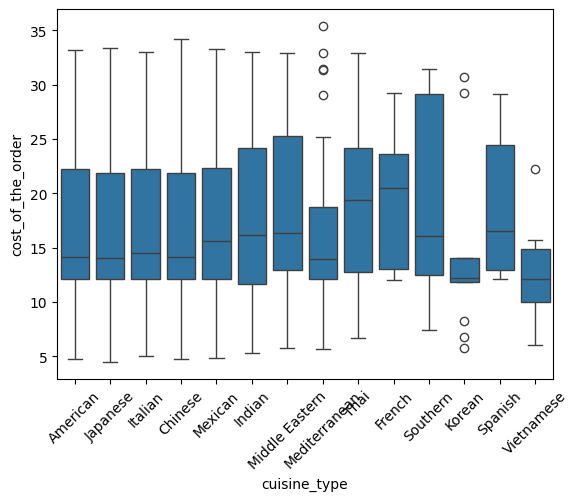

In [ ]:
# Cost Boxplot by Cuisine type
sns.boxplot(
    data = df,
    x = "cuisine_type",
    y = "cost_of_the_order",
    order=total_order.index)
plt.xticks(rotation=45)
plt.show()

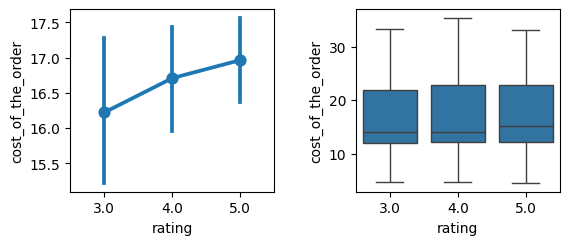

In [ ]:
# Pointplot and Boxplot of Rating vs. Cost
fig = plt.figure(figsize=(10,9))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 3, 1)
sns.pointplot(data=df,
              x="rating",
              y="cost_of_the_order")


ax = fig.add_subplot(3, 3, 2)
sns.boxplot(
    x = "rating",
    y = "cost_of_the_order",
    data = df)

plt.show()

*   For the most popular cuisines (American, Japanese, Italian, Chinese), the average cost of these cuisines are around the overall average of all cuisines. The median cost is towards the bottom of the interquartile range, which means more customers prefers budget friendly items on the menu, the higher priced items are ordered less frequently.  

*   Some Mediterranean restaurant are priced significantly higher than others offer the same food.

*   Korean restaurants have a large price discrepancy with outliers on both ends.

*   Korean and Vietnamese have the lowest price on average, however they are also one of the least popular cuisine types on this platform.

*   Customers are willing to pay slighly higher for higher rated food.  

#### Day of week vs Order duration

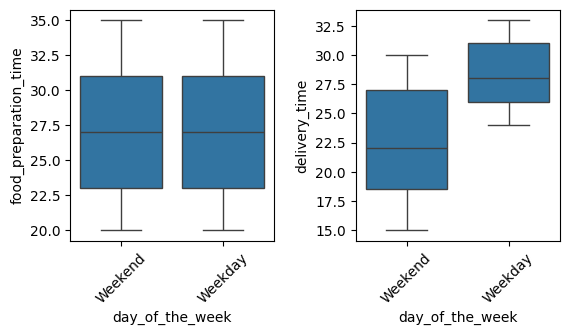

In [ ]:
# Boxplot of Day of the week vs. Time
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)
sns.boxplot(
    x = "day_of_the_week",
    y = "food_preparation_time",
    data = df)
plt.xticks(rotation=45)

ax = fig.add_subplot(1, 3, 2)
sns.boxplot(
    x = "day_of_the_week",
    y = "delivery_time",
    data = df)
plt.xticks(rotation=45)

plt.show()

In [ ]:
df.groupby("day_of_the_week")["delivery_time"].mean().reset_index()

,day_of_the_week,delivery_time
0,Weekday,28.340
1,Weekend,22.470


*   delivery time during the weekday takes 6 mins longer on average
*   there is no difference in food preparation time between weekends or weekdays
*   suggesting potential bottleneck in delivery capacity

#### Cuisine vs. Rating

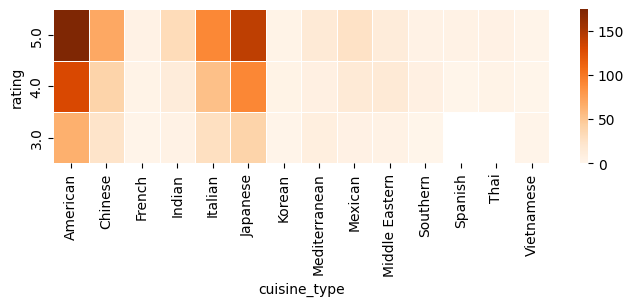

In [ ]:
# Correlation plot of Rating, Cuisine Type vs. Order Quantity
df_piv = df.pivot_table(index = 'rating', columns = 'cuisine_type', values = 'order_id',aggfunc='count').sort_index(ascending=False)
plt.figure(figsize = (8,2)) # To resize the plot
sns.heatmap(df_piv,  fmt = "d", cmap="Oranges", linewidths = .5, vmin = 0)
plt.show()


*   the higher the rating, the more the order.



#### Preparation Time

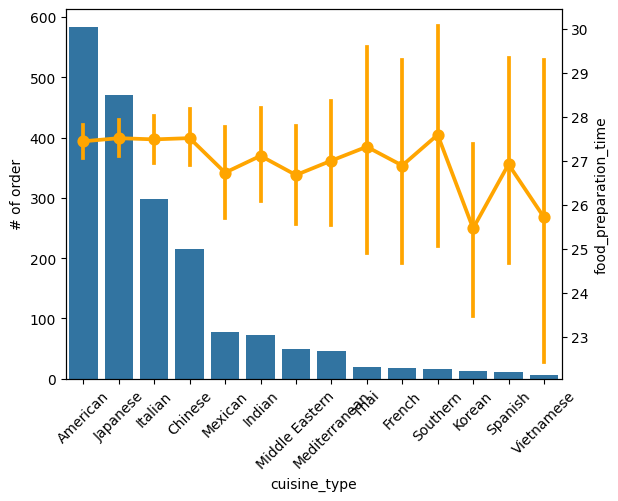

In [ ]:
# Overlay total order barplot & preparation time pointplot
fig, ax1 = plt.subplots()
sns.countplot(data=df,
              x='cuisine_type' ,
              order = df['cuisine_type'].value_counts().index)
ax1.set_ylabel('# of order')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
sns.pointplot(
    data=df,
    x="cuisine_type",
    y="food_preparation_time",
    estimator=lambda x: x.mean(),
    color="orange",
    order=total_order.index)
ax2.set_ylabel('food_preparation_time')

plt.show()

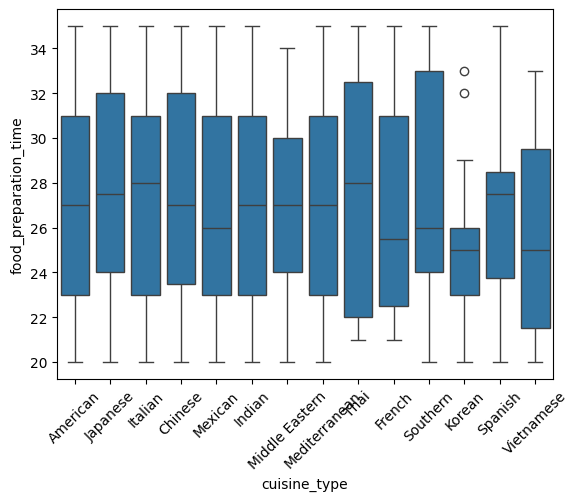

In [ ]:
# Preparation time by cuisine type boxplot
sns.boxplot(
    x = "cuisine_type",
    y = "food_preparation_time",
    order=total_order.index,
    data = df)
plt.xticks(rotation=45)
plt.show()

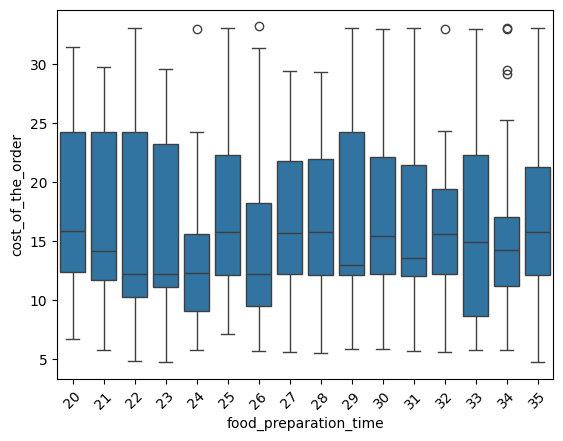

In [ ]:
# cost of the order vs. preparation time boxplot
df_topcuisine = df[df["cuisine_type"].isin(["American"])]

sns.boxplot(
    x = "food_preparation_time",
    y = "cost_of_the_order",
    data = df_topcuisine )
plt.xticks(rotation=45)
plt.show()

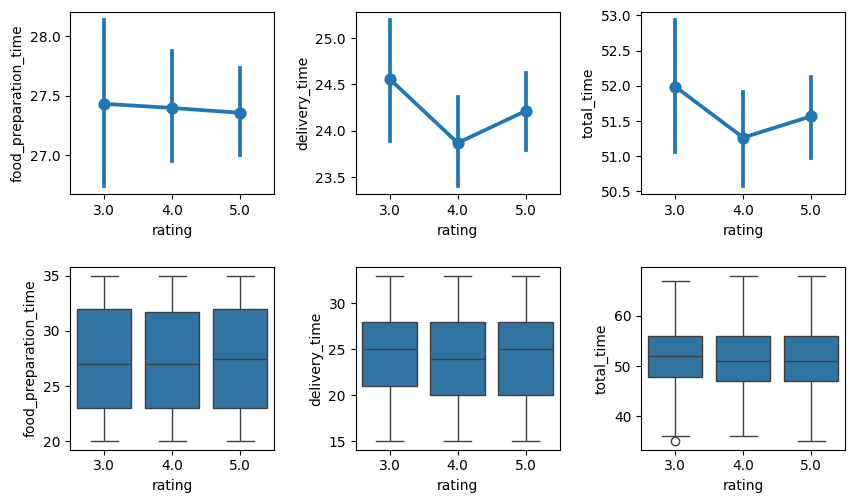

In [ ]:
# Pointplot and boxplot of time vs rating

df['total_time'] = df['food_preparation_time'] + df['delivery_time']

fig = plt.figure(figsize=(10,9))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


ax = fig.add_subplot(3, 3, 4)
sns.pointplot(data=df,
              x="rating",
              y="food_preparation_time")


ax = fig.add_subplot(3, 3, 5)
sns.pointplot(data=df,
              x="rating",
              y="delivery_time")


ax = fig.add_subplot(3, 3, 6)
sns.pointplot(data=df,
              x="rating",
              y="total_time")


ax = fig.add_subplot(3, 3, 7)
sns.boxplot(
    x = "rating",
    y = "food_preparation_time",
    data = df)


ax = fig.add_subplot(3, 3, 8)
sns.boxplot(
    x = "rating",
    y = "delivery_time",
    data = df)


ax = fig.add_subplot(3, 3, 9)
sns.boxplot(
    x = "rating",
    y = "total_time",
    data = df)


plt.show()


*   The top 4 cuisines requires similar time to prepare order, which is close to the average time of all orders.
*   No significant relationship is observed over food prep time vs rating, or food prep time vs cost of the order




In [ ]:
# Most-rated restaurants
restaurant_ratings  = df.groupby("restaurant_name")["rating"].agg(rating_count="count", avg_rating="mean").reset_index()
restaurant_ratings.sort_values(by="rating_count", ascending=False).head(5)

,restaurant_name,rating_count,avg_rating
136,Shake Shack,133,4.278
153,The Meatball Shop,84,4.512
21,Blue Ribbon Sushi,73,4.219
20,Blue Ribbon Fried Chicken,64,4.328
121,RedFarm Broadway,41,4.244


<Axes: xlabel='total_time', ylabel='Count'>

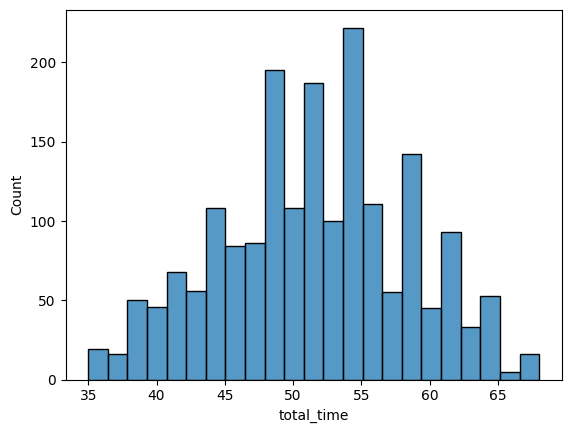

In [ ]:
# Total time from order to delivery
df["total_time"] = df["delivery_time"] + df["food_preparation_time"]
sns.histplot(data=df,x='total_time')

In [ ]:
df['total_time'].describe()

,total_time
count,1898.000
mean,51.534
std,6.834
min,35.000
25%,47.000
50%,52.000
75%,56.000
max,68.000


#### Observations:
25% of orders take more than 56 mins to get delivered.

### Conclusion and Recommendations

In [ ]:
# Top 4 Cuisine Types % Revenue Contribution
top_cuisine_rev = df.groupby("cuisine_type")["cost_of_the_order"].sum().sort_values(ascending=False).head(4).sum() / df["cost_of_the_order"].sum()

# Top 5 Restaurant % Revenue Contribution
top_restaurant_rev = df.groupby(["restaurant_name", "cuisine_type"])["cost_of_the_order"].sum().sort_values(ascending=False).head(5).sum() / df["cost_of_the_order"].sum()

print(f"Top 4 Cuisine Types % Revenue Contribution: {round(top_cuisine_rev * 100, 2)}%")
print(f"Top 5 Restaurant % Revenue Contribution: {round(top_restaurant_rev * 100, 2)}%")

Top 4 Cuisine Types % Revenue Contribution: 81.73%
Top 5 Restaurant % Revenue Contribution: 32.19%


### Conclusions:
**Revenue**:
* The top 5 restaurants contribute ~30% of total revenue, indicating a few major restaurants dominate the platform.
* The 4 popular cuisines are American, Japanese, Italian, Chinese, which contribute over 80% of the total revenue. These cuisines drive most of the business on the platform.

**Rating**:
* Among restaurants of the same cuisine type, highly-rated restaurants receives more order, indicating quality and customer satisfaction influence demand.
* Cuisine types with high price do not guarantee high rating, indicating some restaurants may be overpriced, or did not provide high-than-par service quality to match its price points.
* Customers are willing to pay slightly higher for highly-rated food.

**Order Cost**:
* For the most popular cuisines (American, Japanese, Italian, Chinese), the average cost of these cuisines are close to the overall platform average. The median cost is skewed towards the lower end of the price range, which means more customers prefers budget friendly items on the menu, the higher priced items are ordered less frequently.
* Mediterranean, Korean, and a few Vietnamese restaurants show significant price variation, suggesting inconsistent pricing strategies.
* Furthermore, Korean and Vietnamese have the lowest price on average, however they are also one of the least popular cuisine types on this platform. This indicates that customers are also influenced by other factors besides price, such as service, portion size, food quality.

**Delivery Time**:
* Delivery time significantly increases during the weekdays, while food preparation time remains constant between weekends or weekdays, suggesting potential bottleneck in delivery capacity during weekdays.

### Recommendations:

**Revenue Strategy**:
* Leverage top-performing restaurants and form partnership strategies. Up-sell and cross-sell their menu items, since most customers are ordering budget-friendly items, but are willing to pay higher for high quality food. Promote top restaurants in the search results, provide discounts / promotions for higher-price items to drive adoption.

* The promotions can be customized to each customer's purchase behaviour, or restaurants with higher ratings, as it is more likely for these restaurants to attract and retain new customers.

* Incentivize customers to leave a rating.

* Onboard new restaurants that specialize in popular cuisine types to capture additional customers.

* For restaurants that have a high price but low rating, such as French and Southern, provide feedback to these restaurants.

* Monitor pricing variability and reduce extreme pricing discrepancies.

**Operation**:
* Further analyze the root cause for delivery bottleneck on weekdays, understand whether it varies by hour of the day due to peak demands during lunch and dinner time, or rush hour traffic.


---